In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = os.getcwd() + '/ex1data2.txt'  
unnorm_data = pd.read_csv(path, names=['Size', 'Bedroom', 'Price'])  

# Feature scaling
# (x - meanX) / stdX
data = (unnorm_data - unnorm_data.mean()) / unnorm_data.std()
data.head(n=10)  

,Size,Bedroom,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [4]:
data.describe()

,Size,Bedroom,Price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,3.779483e-17,2.185013e-16,-7.086530e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


In [5]:
def cost_function(X, y, theta):
    inner = np.power((X * theta.T) - y, 2)
    return np.sum(inner) / (2 * len(X))

In [6]:
# insert a column of 1s at the beginning of the data frame in order to make the matrix operations work correctly.
# It gets multiplied with the y intercept term
# [X0 X1.. Xn] x [theta 0]
#                [theta 1]
#                [theta n]
data.insert(0, 'First', 1)

In [7]:
# Number of columns in the data frame
cols = data.shape[1]

In [26]:
X = data.iloc[:,0:cols-1]   
y = data.iloc[:,cols-1:cols]  
X = np.matrix(X.values)  
y = np.matrix(y.values)  

# parameter matrix of 1 x (n + 1) dimention
theta = np.matrix(np.zeros(X.shape[1])) 

(1, 3)


In [21]:
def normal_equation(X, y):
    '''
    Calculate the parameters (theta) using the normal approximation method
    '''
    return (X.T * X).I * (X.T * y)

In [22]:
def gradient_descent(X, y, theta, alpha, iters):
    '''
    Calculate the parameters (theta) using the gradient descent method
    '''
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    
    # Store the cost calculated for all coefficents in a Matrix
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            # derivate term
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = cost_function(X, y, theta)

    return theta, cost


In [23]:
learning_rate = 0.01  
iters = 2500

# g Matrix has the optimal values for theta0 and theta1
# cost Matrix has all the values of cost calculated for thetas during gradient descent
g, cost = gradient_descent(X, y, theta, learning_rate, iters)

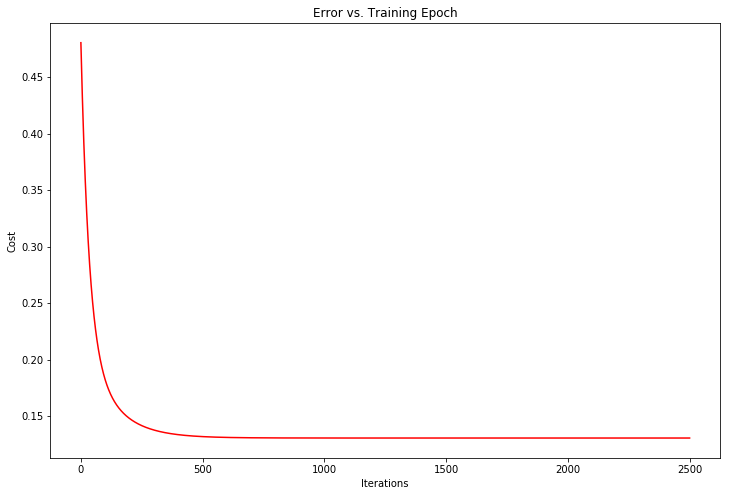

In [24]:
# Illustration of a good learning rate
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

In [28]:
def ssr(y, g):
    y_mean = np.sum(y) / len(y)
    all_costs = X * g.T
    return np.sum(np.power((all_costs - y_mean), 2))

def sst(y, g):
    y_mean = np.sum(y) / len(y)
    return np.sum(np.power((y - y_mean), 2))

def compute_r_squared(y, g):    
    return float(ssr(y, g)) / sst(y, g) * 100

print(compute_r_squared(y, g), "%")



73.2937041889 %
